In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [2]:
link_train = "C:/Users/User/Desktop/perceptron-train.csv"
link_test = "C:/Users/User/Desktop/perceptron-test.csv"

df_train = pd.read_csv(link_train)
df_test = pd.read_csv(link_test)

df_test.columns = ['target_feature', 'feature_1', 'feauture_2']
df_train.columns = ['target_feature', 'feature_1', 'feauture_2']

df_test

,target_feature,feature_1,feauture_2
0,1.0,-0.866495,1191.232457
1,-1.0,0.789828,-475.647768
2,-1.0,0.179549,1959.095353
3,1.0,-0.434351,568.504207
4,1.0,-1.506295,929.584470
...,...,...,...
194,-1.0,1.150206,2559.850231
195,1.0,-0.732462,159.748695
196,1.0,0.412912,-1587.206427
197,-1.0,-0.098685,682.034777


In [3]:
y_train = df_train['target_feature'] 
y_test = df_test['target_feature']

X_train = df_train.drop(columns = ['target_feature'])
X_test = df_test.drop(columns = ['target_feature'])

y_train

0      1.0
1     -1.0
2     -1.0
3      1.0
4     -1.0
      ... 
294   -1.0
295   -1.0
296    1.0
297    1.0
298    1.0
Name: target_feature, Length: 299, dtype: float64

<Axes: >

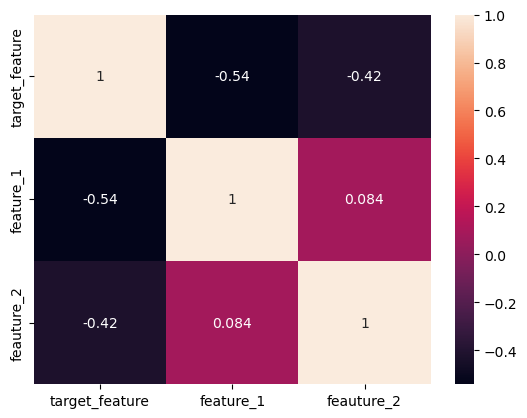

In [4]:
sns.heatmap(df_train.corr(),annot= True)

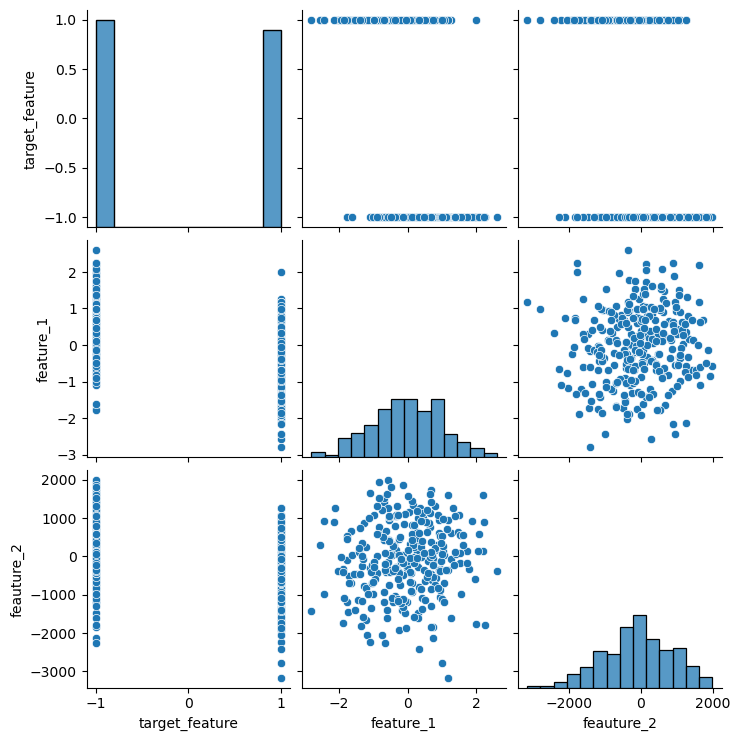

In [5]:
sns.pairplot(df_train)

In [6]:
model = Perceptron(random_state=241)
model

Perceptron(random_state=241)

In [7]:
model.fit(X_train, y_train)

Perceptron(random_state=241)

In [8]:
pred_values = model.predict(X_test)

accuracy_without_scale = accuracy_score(y_test, pred_values)
accuracy_without_scale

0.6532663316582915

In [9]:
pred_values_Series = pd.Series(pred_values)
def MyAccuracyForSeries(y_test, y_pred):
    if len(y_test) != len(y_pred):
        print('Error due to lenght')
        return 
    lenght = len(y_test)
    summa = 0
    for i in range(lenght):
        if y_test.iloc[i] == y_pred.iloc[i]:
            summa += 1
    result = summa / lenght
    return result


MyAccuracyForSeries(y_test, pred_values_Series)

0.6532663316582915

In [10]:
# Привожу к одинаковому масштабу

X_test_StandardScaler = StandardScaler().fit(X_test).transform(X_test)
X_train_StandardScaler = StandardScaler().fit_transform(X_train)

pd.DataFrame(X_train_StandardScaler).head(5), X_train

(          0         1
 0 -0.941734  1.244317
 1  0.341348 -1.466062
 2  0.207790  0.340728
 3 -1.224184 -0.729447
 4  0.277506  0.039787,
      feature_1   feauture_2
 0    -0.978058  1083.198803
 1     0.314272 -1472.977609
 2     0.179752   231.017267
 3    -1.262544  -778.271726
 4     0.249970   -52.801483
 ..         ...          ...
 294  -0.126438  1861.564124
 295  -0.490972  1815.652064
 296  -0.375750  -314.074374
 297  -1.861976 -1083.677679
 298  -0.039329 -1863.884299
 
 [299 rows x 2 columns])

In [11]:
new_model = Perceptron(random_state=241)
new_model

Perceptron(random_state=241)

In [12]:
new_model.fit(X_train_StandardScaler, y_train)

Perceptron(random_state=241)

In [39]:
new_pred_values = new_model.predict(X_test_StandardScaler)

new_accuracy_scale = accuracy_score(y_test, new_pred_values)
new_accuracy_scale

0.678391959798995

In [33]:
new_pred_values_Series = pd.Series(new_pred_values)
MyAccuracyForSeries(y_test, new_pred_values_Series)

0.678391959798995

In [35]:
print(f'Answer is {new_accuracy_scale - accuracy_without_scale}')

Answer is 0.025125628140703515
